<a href="https://colab.research.google.com/github/MichalDataSc/data_analytics/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "https://data.insideairbnb.com/spain/catalonia/barcelona/2025-09-14/data/listings.csv.gz"
df = pd.read_csv(url)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20250914152803,2025-09-15,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.62,4.82,4.32,ESFCTU000008058000039706000000000000000HUTB-00...,t,26,26,0,0,0.34
1,23197,https://www.airbnb.com/rooms/23197,20250914152803,2025-09-14,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,"Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.99,4.66,4.68,ESFCTU000008106000547162000000000000000000HUTB...,f,1,1,0,0,0.52
2,32711,https://www.airbnb.com/rooms/32711,20250914152803,2025-09-15,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,...,4.89,4.89,4.47,HUTB-001722,f,2,2,0,0,0.88
3,34241,https://www.airbnb.com/rooms/34241,20250914152803,2025-09-15,city scrape,Stylish Top Floor Apartment - Ramblas Plaza Real,Located in close proximity to Plaza Real and L...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,...,4.68,4.73,4.23,Exempt,f,3,3,0,0,0.14
4,34981,https://www.airbnb.com/rooms/34981,20250914152803,2025-09-15,city scrape,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Spacious apartment for large families or group...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,73163,...,4.72,4.65,4.46,ESFCTU000008119000093652000000000000000HUTB-00...,f,3,3,0,0,1.49


1. Wprowadzenie do Machine Learning (ML)

Machine Learning (ML) to dziedzina sztucznej inteligencji, która pozwala komputerom uczyć się na podstawie danych.
Zamiast pisać reguły ręcznie, dostarczamy przykłady – dane – a komputer sam uczy się zależności.

Główne rodzaje ML:

Supervised learning (uczenie nadzorowane) – mamy dane wejściowe i etykietę (np. cechy mieszkania → cena).

Unsupervised learning – dane bez etykiety (np. grupowanie klientów).

Reinforcement learning – uczenie przez nagrody i kary.

W tym notebooku skupiamy się na supervised learning.

2. Supervised learning – co to jest?

W supervised learning chcemy przewidywać pewną konkretną wartość, korzystając z przykładów, które mają input i output.

Przykład:
Wejście → cechy mieszkania: liczba pokoi, lokalizacja, powierzchnia
Wyjście → cena

Chcemy, aby model nauczył się funkcji:

features → price


A potem zastosował ją do nowych danych.

W tym notatniku przewidujemy:

🎯 price – cenę noclegu na AirBnb w Barcelonie

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns


## Wczytanie danych

In [3]:
url = "https://data.insideairbnb.com/spain/catalonia/barcelona/2025-09-14/data/listings.csv.gz"
df = pd.read_csv(url)

df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20250914152803,2025-09-15,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.62,4.82,4.32,ESFCTU000008058000039706000000000000000HUTB-00...,t,26,26,0,0,0.34
1,23197,https://www.airbnb.com/rooms/23197,20250914152803,2025-09-14,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,"Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.99,4.66,4.68,ESFCTU000008106000547162000000000000000000HUTB...,f,1,1,0,0,0.52
2,32711,https://www.airbnb.com/rooms/32711,20250914152803,2025-09-15,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,...,4.89,4.89,4.47,HUTB-001722,f,2,2,0,0,0.88
3,34241,https://www.airbnb.com/rooms/34241,20250914152803,2025-09-15,city scrape,Stylish Top Floor Apartment - Ramblas Plaza Real,Located in close proximity to Plaza Real and L...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,...,4.68,4.73,4.23,Exempt,f,3,3,0,0,0.14
4,34981,https://www.airbnb.com/rooms/34981,20250914152803,2025-09-15,city scrape,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Spacious apartment for large families or group...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,73163,...,4.72,4.65,4.46,ESFCTU000008119000093652000000000000000HUTB-00...,f,3,3,0,0,1.49



## Wstępne przygotowanie danych

Użyjemy prostych cech numerycznych (możesz to pokazać jako demo – nie chodzi o perfekcję, tylko o edukację).


In [4]:
df = df[['price','latitude','longitude','accommodates','bedrooms','bathrooms','number_of_reviews', 'availability_30', 'host_listings_count', 'minimum_nights', 'review_scores_rating']]

df = df.dropna()  # usuwamy wiersze z brakami
df.head()

,price,latitude,longitude,accommodates,bedrooms,bathrooms,number_of_reviews,availability_30,host_listings_count,minimum_nights,review_scores_rating
0,$210.00,41.405560,2.17262,8,3.0,2.0,51,12,41.0,1,4.34
1,$285.00,41.412432,2.21975,5,3.0,2.0,91,10,6.0,3,4.82
2,$170.00,41.405660,2.17015,6,2.0,1.5,152,13,3.0,1,4.46
3,$110.00,41.380620,2.17517,2,1.0,1.0,25,30,5.0,31,4.36
4,$333.00,41.379780,2.17623,9,4.0,3.0,271,10,5.0,5,4.57


In [5]:
df['price'] = (
    df['price']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)


X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Baseline!

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Baseline prediction = mean of the training target
baseline_pred = np.full_like(y_test, fill_value=y_train.mean(), dtype=float)

baseline_mae = mean_absolute_error(y_test, baseline_pred)

print("Baseline MAE (predicting mean):", baseline_mae)


Baseline MAE (predicting mean): 108.0425984213272




## Trenowanie modelu Random Forest

Random Forest to model oparty na wielu drzewach decyzyjnych.
Zalety:

działa "out of the box"

radzi sobie z nieliniowościami

odporny na overfitting (bardziej niż pojedyncze drzewo)

In [6]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

## Predykcja na zbiorze testowym

In [7]:
y_pred = model.predict(X_test)


## Metryki oceny – czym są i którą wybieramy

Metryki sukcesu pozwalają ocenić, czy model działa dobrze.

Do regresji popularne są:

MAE – Mean Absolute Error (średni błąd bezwzględny)

MSE – Mean Squared Error

RMSE – Root Mean Squared Error

R² – współczynnik wyjaśnienia wariancji

🟦 Dlaczego MAE?

jest intuicyjna (średnia różnica między przewidywaną a prawdziwą ceną)

jednostka = jednostka ceny

odporna na ekstremalne wartości bardziej niż MSE

Liczymy:

In [8]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 55.413645693054285


## DataFrame z price i predicted_price

In [9]:
results = pd.DataFrame({
    'price': y_test,
    'predicted_price': y_pred
})

results.head()

,price,predicted_price
4764,200.0,83.175
18063,234.0,389.120
239,342.0,292.725
14836,223.0,241.970
12723,89.0,81.820


## Prosty wykres porównujący

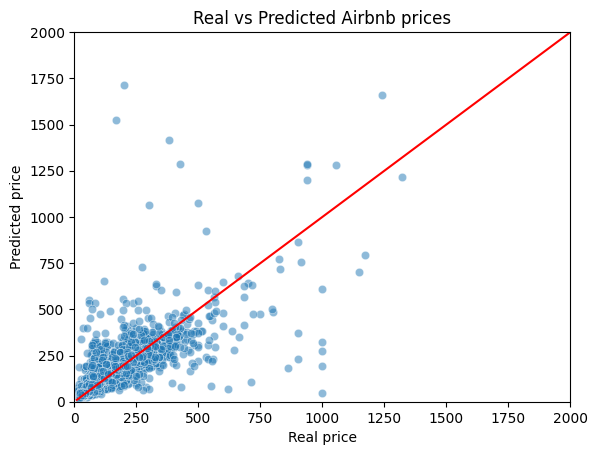

In [10]:
sns.scatterplot(data=results, x='price', y='predicted_price', alpha=0.5)
plt.xlabel("Real price")
plt.ylabel("Predicted price")
plt.title("Real vs Predicted Airbnb prices")
plt.xlim(0, 2000)
plt.ylim(0, 2000)
plt.plot([results.price.min(), results.price.max()],
         [results.price.min(), results.price.max()],
         color='red')  # linia idealnych predykcji
plt.show()

## No dobrze - to zorganizujmy turniej

In [11]:
from sklearn.metrics import mean_absolute_error

def evaluate_model(model, X_test, y_test):
    """
    Zwraca MAE modelu na zbiorze testowym.
    Parametry:
        model  — wytrenowany model
        X_test — cechy zbioru testowego
        y_test — target zbioru testowego
    """
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae


from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

print("Random Forest MAE:", evaluate_model(rf, X_test, y_test))

from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=10,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

print("XGBoost MAE:", evaluate_model(xgb, X_test, y_test))

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=None,
    random_state=42
)

dt.fit(X_train, y_train)

print("Decision Tree MAE:", evaluate_model(dt, X_test, y_test))


from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Linear Regression MAE:", evaluate_model(lr, X_test, y_test))




Random Forest MAE: 55.413645693054285
XGBoost MAE: 54.24787938589756
Decision Tree MAE: 72.30424628450106
Linear Regression MAE: 80.78407133331632


## Feature importance

In [12]:
import shap

# Initialize JS visualization (optional, for notebooks)
shap.initjs()

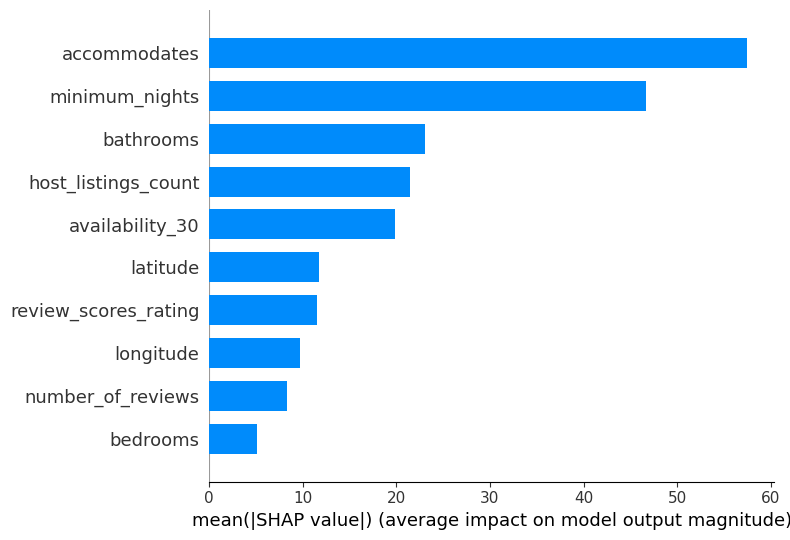

In [13]:
X_sample = X_test.sample(300, random_state=42)
rf_explainer = shap.TreeExplainer(rf)
rf_shap_values = rf_explainer.shap_values(X_sample)

shap.summary_plot(rf_shap_values, X_sample, plot_type="bar")
plt.show()


XGBoost — SHAP Summary Plot


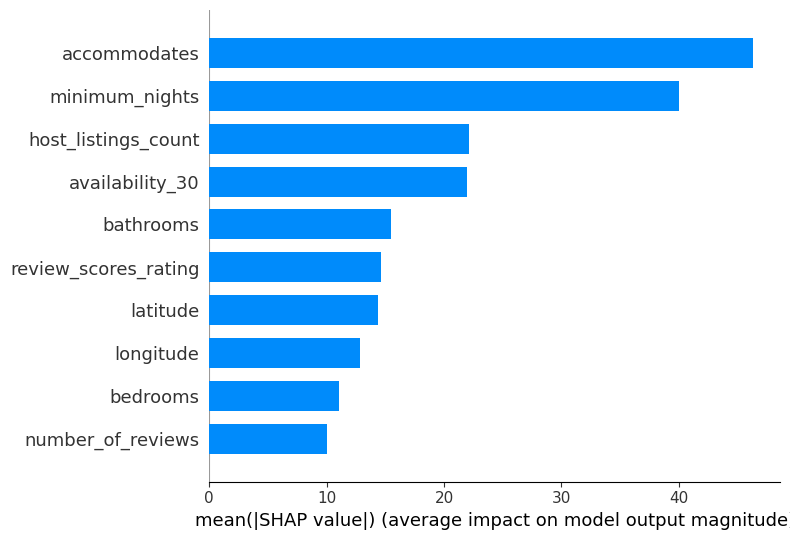

In [14]:
# SHAP for XGBoost
xgb_explainer = shap.TreeExplainer(xgb)
xgb_shap_values = xgb_explainer.shap_values(X_sample)

print("XGBoost — SHAP Summary Plot")
shap.summary_plot(xgb_shap_values, X_sample, plot_type="bar")
plt.show()

## Param tuning

In [15]:
from sklearn.model_selection import RandomizedSearchCV

# Base model
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Parameter grid: 2–3 values each
param_grid = {
    "n_estimators": [500, 1000, 1500],
    "learning_rate": [0.005, 0.01, 0.02],
    "max_depth": [6, 10, 14],
    "subsample": [0.7, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.2]
}

# Random search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,                 # number of random trials
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search
random_search.fit(X_train, y_train)

# Best model and score
print("Best Params:", random_search.best_params_)
print("Best MAE (CV):", -random_search.best_score_)

# Evaluate on test set
best_xgb = random_search.best_estimator_
print("Test MAE:", evaluate_model(best_xgb, X_test, y_test))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Params: {'subsample': 0.9, 'n_estimators': 1500, 'min_child_weight': 1, 'max_depth': 14, 'learning_rate': 0.02, 'gamma': 0.1, 'colsample_bytree': 0.7}
Best MAE (CV): 62.799113647113494
Test MAE: 54.825468753401644
